# Lagrangian Duality

Preamble: Run the cells below to import the necessary Python packages

*This notebook created by William Gilpin. Consult the [course website](https://www.wgilpin.com/cphy) for all content and [GitHub repository](https://github.com/williamgilpin/cphy) for raw files and runnable online code.*

In [1]:
# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
%matplotlib inline

# Import linear algebra module
import numpy as np


We start by stating our optimization problem in the form of a minimization problem:

$$
\begin{aligned}
\text{minimize} \quad & f(x) \\
\text{subject to} \quad & x \geq 0,
\end{aligned}
$$

where the univariate $f: \mathbb{R} \to \mathbb{R}$ is a convex function. Any value of $x$ that satisfies the constraint $x \geq 0$ is called a *feasible solution.* The set of all feasible solutions is called the *feasible set.*

As an example, below we choose the function

$$
f(x) = x^2 - 2x
$$


Text(0, 0.5, 'f(x)')

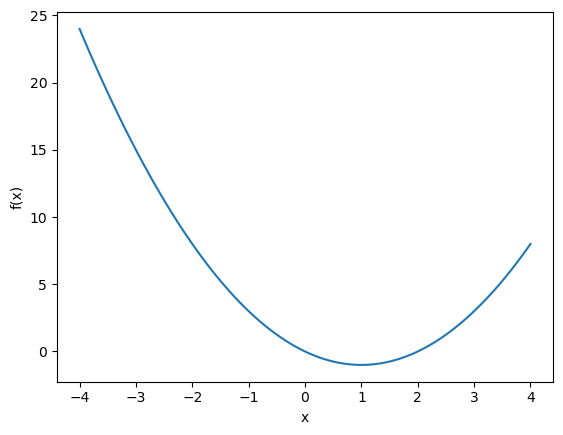

In [7]:
x = np.linspace(-4, 4, 100)
f = lambda x: x**2 - 2 * x

plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('f(x)')

We start by writing this problem in the form of a Lagrangian:

$$
\min_x L(x, \lambda) = f(x) - \lambda\, x.
$$

Where $\lambda$ is the Lagrange multiplier. If $\lambda \geq 0$, then the solution to the optimization problem is given by taking the derivative of the Lagrangian with respect to $x$ and setting it equal to zero:

$$
\frac{d}{dx} L(x, \lambda) = f'(x) - \lambda = 0.
$$

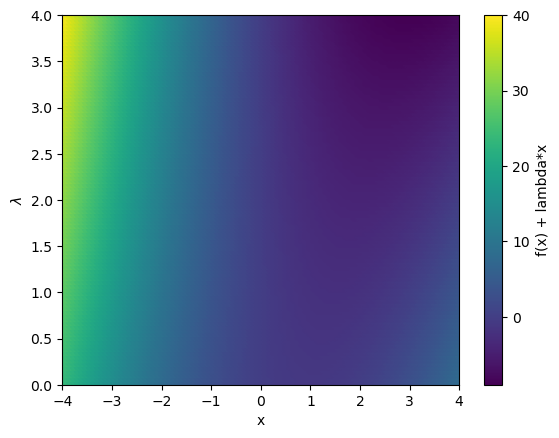

In [29]:
lagrange_primal = lambda x, lam: f(x) - lam * x

xx = np.linspace(-4, 4, 100)
lamvals = np.linspace(0, 4, 100)

# create uniform meshgrid
x_mesh, lam_mesh = np.meshgrid(xx, lamvals)
langrange_primal_values = lagrange_primal(x_mesh, lam_mesh)


plt.figure()
plt.scatter(x_mesh.ravel(), lam_mesh.ravel(), 
            c=langrange_primal_values.ravel(), 
            cmap='viridis'
)
plt.ylim(np.min(lamvals), np.max(lamvals))
plt.xlim(np.min(xx), np.max(xx))
plt.xlabel('x')
plt.ylabel('$\lambda$')

plt.colorbar(label='f(x) + lambda*x')

The resulting relationship $\lambda(x) = f'(x)$ is the the *KKT condition* for the optimization problem. Notice that there is an implicit constraint on $\lambda$ that $\lambda \geq 0$. If $\lambda = 0$, then the solution to the original optimization problem is $x = 0$.

For our example, we have $f'(x) = 2x - 2$, so the KKT condition becomes
$$
\lambda = 2x - 2.
$$
with the constraint $\lambda \geq 0$.


Text(0, 0.5, '$\\lambda$')

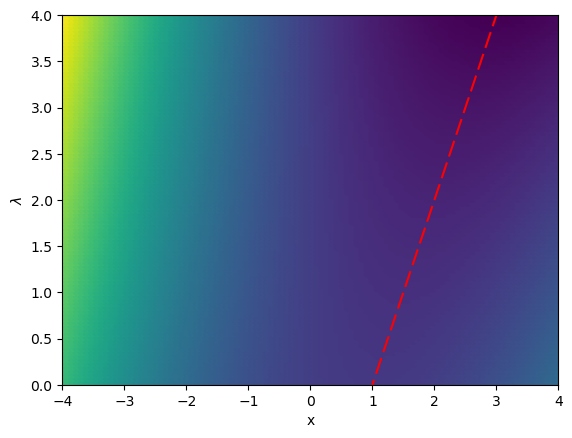

In [35]:
# The KKT condition
lam_kkt = lambda x: 2 * x - 2

plt.figure()
plt.scatter(x_mesh.ravel(), lam_mesh.ravel(), 
            c=langrange_primal_values.ravel(), 
            cmap='viridis'
)
plt.plot(lamvals, lam_kkt(lamvals), '--r', dashes=(8, 3))
plt.ylim(np.min(lamvals), np.max(lamvals))
plt.xlim(np.min(xx), np.max(xx))
plt.xlabel('x')
plt.ylabel('$\lambda$')


Now, we seek to write the dual function. We revisit the Lagrangian and use the KKT to write it as a function of $\lambda$ only

$$
L(\lambda) = \min_x L(x, \lambda) = \min_x f(x) - \lambda x.
$$

For our example, we have $f(x) = x^2 - 2x$, so the Lagrangian becomes
$$
L(x, \lambda) = x^2 - 2x - \lambda x.
$$

We insert our $KKT$ condition, $x = \frac{\lambda + 2}{2}$, into the Lagrangian to get the dual function:

$$
q(\lambda) = \left(\frac{\lambda + 2}{2}\right)^2 - (2 + \lambda)\left(\frac{\lambda + 2}{2}\right).
$$

The dual optimization problem is then

$$
\begin{aligned}
\text{maximize} \quad & q(\lambda) \\
\text{subject to} \quad & \lambda \geq 0.
\end{aligned}
$$


Text(0, 0.5, 'Lagrange dual function')

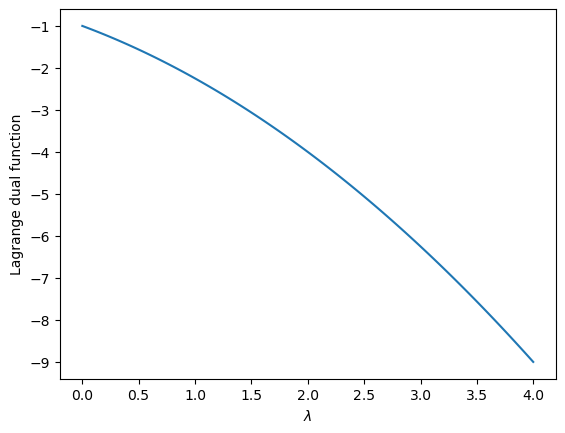

In [44]:
lagrange_dual = lambda lam: ((lam + 2) / 2)**2 - (2 + lam) * ((lam + 2) / 2)

plt.figure()
plt.plot(lamvals, lagrange_dual(lamvals))
plt.xlabel('$\lambda$')
plt.ylabel('Lagrange dual function')


Now, we want to substitute the KKT condition back into the Lagrangian. We will combine the KKT condition and constraint into a single equation:

$$
\lambda = 2x - 2 \quad \text{and} \quad \lambda \geq 0.
$$ 

We define the ReLU (rectified linear unit) function as
$$
\text{ReLU}(.) \equiv \max(0, .).
$$

then the KKT condition and constraint can be written as a single equation:
$$
\lambda = \text{ReLU}(2x - 2).
$$

We now want to insert this equation back into the Lagrangian. There are several cases to consider:

1. If $x \geq 1$, then $\lambda = 2x - 2$ and the Lagrangian is
$$
L(x, \lambda) = x^2 - 2x - \lambda x = x^2 - 2x - (2x - 2)x = -x^2 + 2x.
$$

2. If $x < 1
$, then $\lambda = 0$ and the Lagrangian is
$$
L(x, \lambda) = x^2 - 2x.
$$

So the overall dual Lagrangian is
$$
L(x, \lambda) = x^2 - 2x - \text{ReLU}(2x^2 - 4x).
$$




Text(0, 0.5, '$\\lambda$')

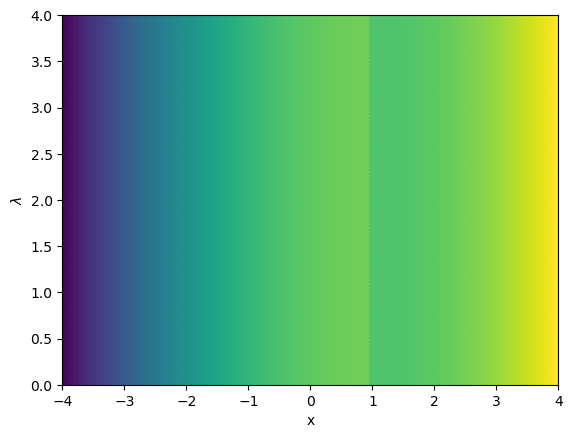

In [42]:

def relu(y):
    return np.maximum(0, y)

def lagrange_dual(x, lam):
    if x < 1:
        return -x**2 + 2 * x
    else:
        return x**2 - 2 * x
    return x**2 - 2 * x + relu(2 * x**2 - 4 * x)
    
lagrange_dual_values = np.vectorize(lagrange_dual)(x_mesh, lam_mesh)

plt.figure()
plt.scatter(x_mesh.ravel(), lam_mesh.ravel(), c=lagrange_dual_values.ravel(), cmap='viridis')
# plt.plot(lamvals, lam_kkt(lamvals), '--r', dashes=(8, 3))
plt.ylim(np.min(lamvals), np.max(lamvals))
plt.xlim(np.min(xx), np.max(xx))
plt.xlabel('x')
plt.ylabel('$\lambda$')

In [ ]:
x  = -1 + lam / 2





We can see that solving the Lagrangian involved reduced to an equality condition for $x$. We can therefore write a new optimization problem that involves only $\lambda$:

Now, to form the dual problem, we define the dual function g(λ) as:
$$
g(\lambda) = \inf_{x} L(x, \lambda) = \inf_{x} [f(x) + \lambda x]
$$
Here, "inf" denotes the infimum (greatest lower bound) of the function with respect to x.

Solving this equation gives us x as a function of λ, let's call it x*(λ). Then:
$$
g(\lambda) = f(x^(\lambda)) + \lambda x^(\lambda)
$$

$$
\begin{aligned}
\text{maximize} \quad & f(x^(\lambda)) + \lambda x^(\lambda) \
\text{subject to} \quad & \lambda \geq 0
\end{aligned}
$$

<!-- $$
\begin{aligned}
\text{minimize} \quad & g(\lambda) = \min_x L(x, \lambda) \\
\text{subject to} \quad & \lambda \geq 0.
\end{aligned}
$$

The function $g(\lambda)$ is called the *dual function* of the original optimization problem. The dual function is a concave function of $\lambda$. The dual function is concave because it is the pointwise minimum of a set of affine functions of $\lambda$. -->


In [ ]:
# Define the primal problem
def f(x):
    return (x - 2)**2


Optimal x: 2.0000
Optimal primal value: 0.0000
Optimal lambda: -1024.0000
Optimal dual value: 263168.0092


/Users/william/micromamba/envs/cphy/lib/python3.11/site-packages/scipy/optimize/_minimize.py:580: RuntimeWarning: Method BFGS cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
/Users/william/micromamba/envs/cphy/lib/python3.11/site-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method BFGS cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


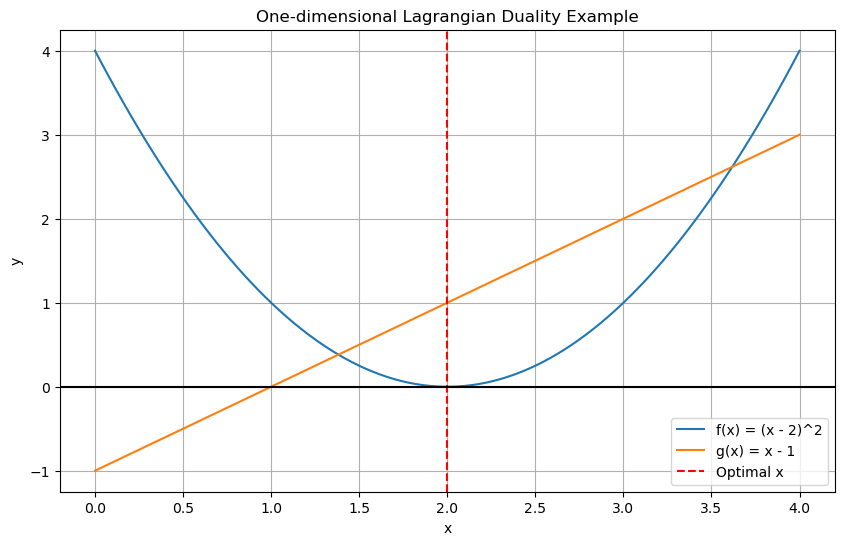

In [5]:


from scipy.optimize import minimize_scalar

# Define the primal problem
def f(x):
    return (x - 2)**2

def g(x):
    return x - 1

# Define the Lagrangian
def lagrangian(x, lambda_):
    return f(x) + lambda_ * g(x)

# Define the dual function
def dual_function(lambda_):
    result = minimize_scalar(lambda x: -lagrangian(x, lambda_))
    return -result.fun

# Solve the dual problem
result = minimize_scalar(lambda lambda_: -dual_function(lambda_), bounds=(0, None))
optimal_lambda = result.x
optimal_dual_value = -result.fun

# Solve the primal problem
primal_result = minimize_scalar(f, bounds=(1, None))
optimal_x = primal_result.x
optimal_primal_value = primal_result.fun

# Print results
print(f"Optimal x: {optimal_x}")
print(f"Optimal primal value: {optimal_primal_value}")
print(f"Optimal lambda: {optimal_lambda}")
print(f"Optimal dual value: {optimal_dual_value}")

# Plot the results
x = np.linspace(0, 4, 100)
y_f = f(x)
y_constraint = g(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y_f, label='f(x) = (x - 2)^2')
plt.plot(x, y_constraint, label='g(x) = x - 1')
plt.axvline(x=optimal_x, color='r', linestyle='--', label='Optimal x')
plt.axhline(y=0, color='k', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('One-dimensional Lagrangian Duality Example')
plt.legend()
plt.grid(True)
plt.show()